# Points Map

A simple notebook that reads some points from a file called `points.py` and maps them

## Import libraries

In [1]:
# Geospatial library import
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


# This is the points.py python file where our points are written down
# Importing it gives us access to the get_points() function
try:
    import points
except ImportError:
    print("points.py not found. If you are running this in Google Colab, please see the code chunk below to download points.py from your GitHub repository.")

In [ ]:
# We may also need to install mapclassify to use the gdf.explore() function and contextily for basemaps

!pip install contextily
!pip install mapclassify

import contextily as ctx

## Download the points.py file

If we are running python locally (i.e. on your own computer, not through Colab) then the following chunk is not necessary because we can automatically access the `points.py` file in the same directory as this notebook.

However, if we are running this notebook in Google Colab then we need to download the `points.py` file from your GitHub repository first.

If you are using Google Colab then in the following code, replacing `GITHUB_USER` with your own GitHub username. It will then download the `points.py` file from your fork of the class repository into your Colab file space.

If you are running this notebook locally then you can skip this chunk (it will actually raise and error because it cannot find the `/content` directory).

In [ ]:
# --- Setup: fetch points.py from your fork ---
GITHUB_USER = "YOUR GITHUB USER NAME"   # <-- STUDENT: change this once
REPO = "GEOG5415M-Class_Repository"
BRANCH = "main"
FILE = "points.py"

import os, urllib.request, importlib, sys

raw_url = f"https://raw.githubusercontent.com/{GITHUB_USER}/{REPO}/{BRANCH}/{FILE}"
dst = os.path.join("/content", FILE)

try:
    urllib.request.urlretrieve(raw_url, dst)
    print(f"Downloaded {FILE} from {raw_url}")
except Exception as e:
    raise RuntimeError(f"Could not fetch {FILE} from {raw_url}. "
                       f"Check your username/branch/file path.\n{e}")

# Ensure current dir is on the Python path then import
if "/content" not in sys.path:
    sys.path.insert(0, "/content")

import points  # after download, this should work
importlib.reload(points)  # handy if students re-run after edits
print("Imported points.py successfully.")


## Get the points

Call the function `get_points()` from `points.py` to get a list of points

In [3]:
points_list = points.get_points()
points_list

[[53.808478, -1.5527924, 'University of Leeds'],
 [53.840032, -1.6432286, "Nick's neighbourhood"]]

## Map the points

Convert the list of points to a GeoDataFrame and map them statically (to display directly in GitHub) and interactively so that you can see the points here.

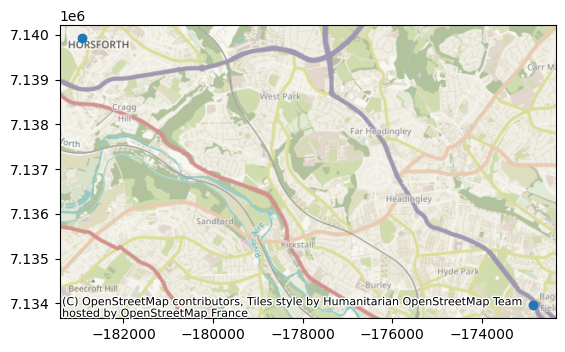

In [4]:
# Create a GeoDataFrame from the points list
gdf = gpd.GeoDataFrame(
    points_list,  # We use all of the data in points_list to create the GeoDataFrame
    columns=['latitude', 'longitude', 'name'],  # Give the columns names
    geometry=[Point(lon, lat) for lat, lon, _ in points_list],  # Create Point geometries from the lat/lon pairs
    crs="EPSG:4326"  # Set the coordinate reference system to WGS84 (latitude/longitude)
)

ax = gdf.to_crs(epsg=3857).plot()
ctx.add_basemap(ax)



Interactive map:

In [5]:
# Use gpd.explore() to create an interactive map
gdf.explore(
    tooltip="name",  # Show the 'name' attribute when hovering over a point
    style_kwds={"radius": 8}  # Set the marker size using the 'radius' key
)

